In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
netflix=pd.read_csv('netflix_titles.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
netflix.shape

(8807, 12)

In [7]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
netflix.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [11]:
netflix.duplicated().sum()

0

In [12]:
netflix.dropna()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [18]:
# Convert the 'date_added' column to datetime
netflix["date_added"] = pd.to_datetime(netflix['date_added'], errors='coerce')

# Extract day, month, and year from the 'date_added' column
netflix['day_added'] = netflix['date_added'].dt.day
netflix['month_added'] = netflix['date_added'].dt.month
netflix['year_added'] = netflix['date_added'].dt.year

# Convert day_added and year_added to integer (if needed)
netflix['day_added'] = netflix['day_added'].astype('Int64')  # Handles NaN values gracefully
netflix['year_added'] = netflix['year_added'].astype('Int64')

In [19]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9.0,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9.0,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,9.0,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24,9.0,2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,9.0,2021


Text(0.5, 1.0, 'Type')

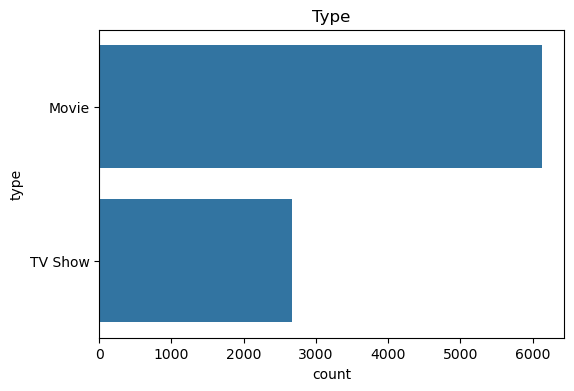

In [21]:
sns.countplot(netflix['type'])
fig = plt.gcf()
fig.set_size_inches(6,4)
plt.title('Type')

C:\Users\555555\AppData\Local\Temp\ipykernel_3184\3805498253.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.countplot(netflix['rating']).set_xticklabels(sns.countplot(netflix['rating']).get_xticklabels(), rotation=90, ha="right")


(Text(0.5, 1.0, 'Rating'),)

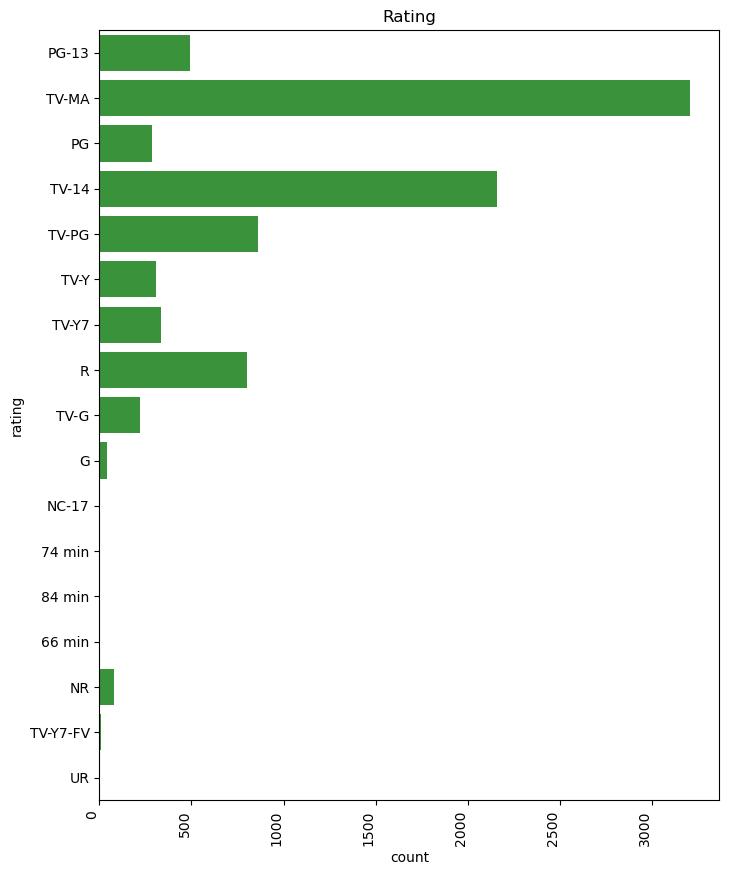

In [31]:
sns.countplot(netflix['rating'])
sns.countplot(netflix['rating']).set_xticklabels(sns.countplot(netflix['rating']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(8,10)
plt.title('Rating'),

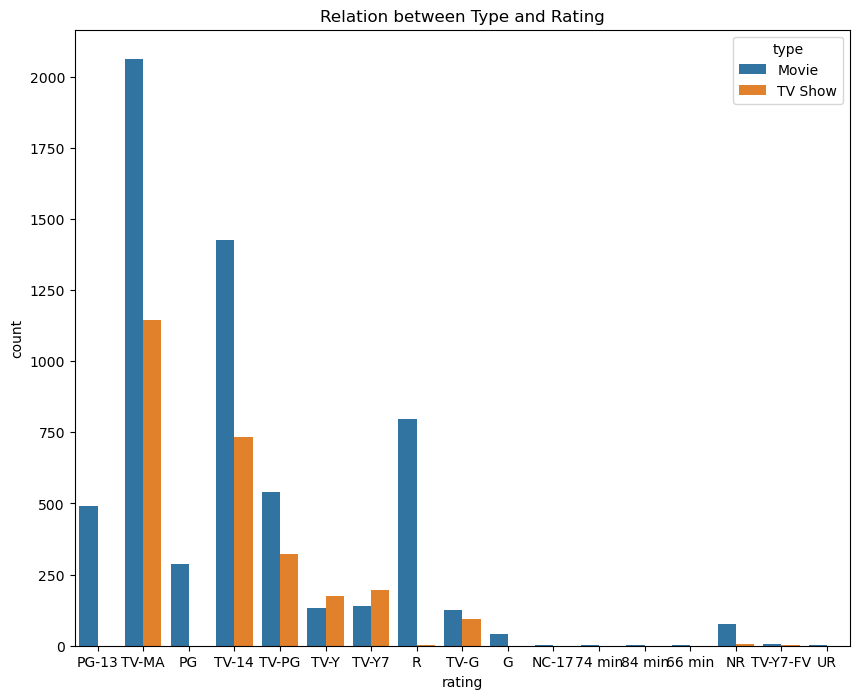

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=netflix)
plt.title('Relation between Type and Rating')
plt.show()

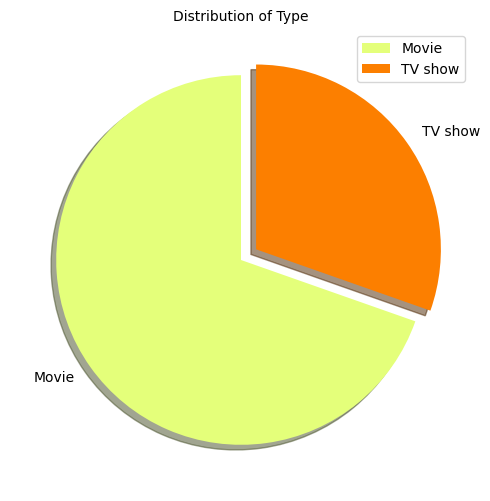

In [36]:
labels = ['Movie', 'TV show']
size = netflix['type'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (6, 6)
plt.pie(size,labels=labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Type', fontsize = 10)
plt.legend()
plt.show()

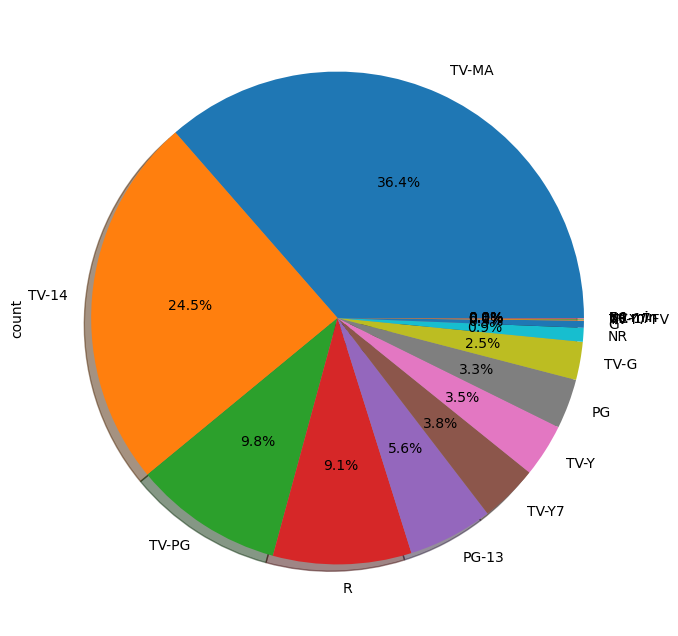

In [35]:
netflix['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

In [37]:
!pip install wordcloud

In [38]:
from wordcloud import WordCloud

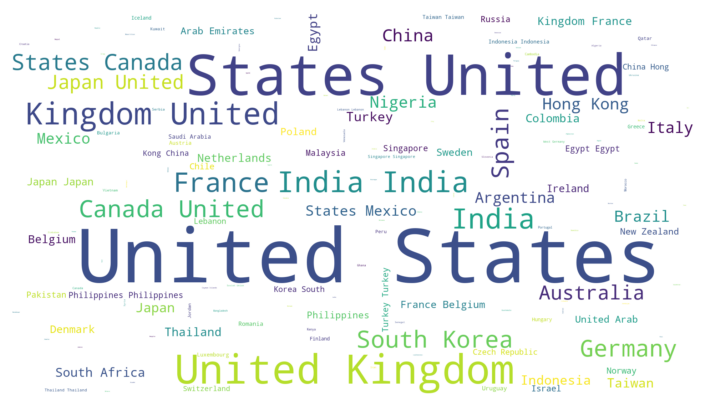

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure the 'country' column has no missing values and is of string type
netflix['country'] = netflix['country'].fillna('')  # Replace NaN values with an empty string

# Generate WordCloud
plt.subplots(figsize=(10, 5))
wordcloud = WordCloud(
    background_color='white',
    width=1920,
    height=1080
).generate(" ".join(netflix['country'].astype(str)))

# Display WordCloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Save the WordCloud as an image
plt.savefig('country.png', dpi=300)

# Show the WordCloud
plt.show()

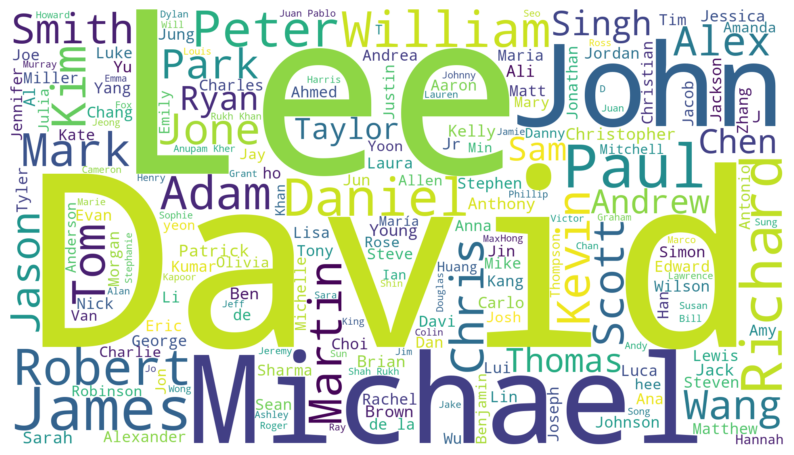

In [48]:
# Ensure the 'cast' column has no missing values and is of string type
netflix['cast'] = netflix['cast'].fillna('')  # Replace NaN with an empty string

# Generate WordCloud
plt.subplots(figsize=(10, 6))
wordcloud = WordCloud(
    background_color='white',
    width=1920,
    height=1080
).generate(" ".join(netflix['cast'].astype(str)))

# Display the WordCloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Save the WordCloud as an image
plt.savefig('cast.png', dpi=300)

# Show the plot
plt.show()

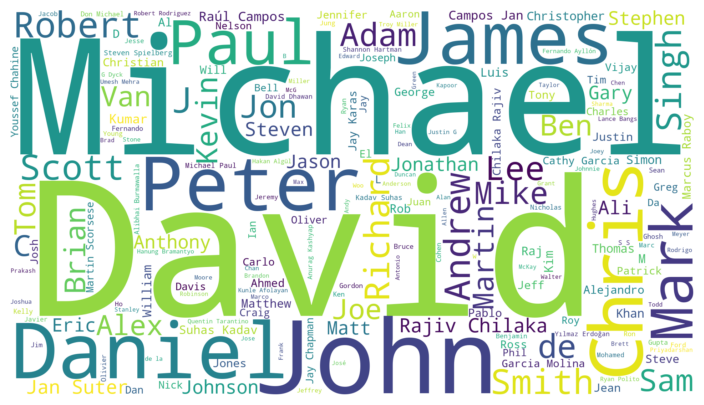

In [52]:
# Ensure the 'director' column has no missing values and is of string type
netflix['director'] = netflix['director'].fillna('').astype(str)

# Generate the WordCloud
plt.subplots(figsize=(10, 5))
wordcloud = WordCloud(
    background_color='white',
    width=1920,
    height=1080
).generate(" ".join(netflix['director']))

# Display the WordCloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Save the WordCloud as an image
plt.savefig('director.png', dpi=300)

# Show the plot
plt.show()

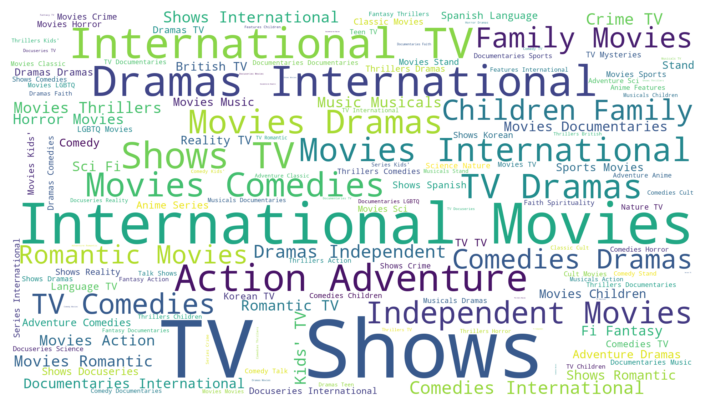

In [55]:
# Handle missing values and ensure data type is string
netflix['listed_in'] = netflix['listed_in'].fillna('').astype(str)

# Generate the WordCloud
plt.subplots(figsize=(10, 5))
wordcloud = WordCloud(
    background_color='white',
    width=1920,
    height=1080
).generate(" ".join(netflix['listed_in']))

# Display the WordCloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Save the WordCloud to a file
plt.savefig('category.png', dpi=300)

# Show the plot
plt.show()